In [1]:
import pandas as pd

## Load the File

In [2]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

In [6]:
print(data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

## Identify Top 10 Publisher

In [3]:
top_publishers = data['publisher'].value_counts().reset_index()
top_publishers.columns = ['publisher', 'article_count']

## Top 10 Publishers by Article Count

In [5]:

print(top_publishers.head(10))

           publisher  article_count
0      Paul Quintaro         228373
1         Lisa Levin         186979
2  Benzinga Newsdesk         150484
3      Charles Gross          96732
4      Monica Gerson          82380
5       Eddie Staley          57254
6         Hal Lindon          49047
7      ETF Professor          28489
8         Juan Lopez          28438
9     Benzinga Staff          28114


## Analyze News Types by Publisher

In [7]:
# the column indicating news type for the demonstration the headline represents different news catagories
news_by_publisher = data.groupby(['publisher', 'headline']).size().reset_index(name='count')


## News Types by Publisher

In [8]:
print(news_by_publisher.head(10))

     publisher                                           headline  count
0   47ertrends    Saturday, February 11, 2012 Stock Market Trends      9
1   47ertrends    Saturday, February 18, 2012 Stock Market Trends      9
2         AARP  3 Ways Small Businesses Can Get Emergency Help...      5
3         AARP  5 Ways To Earn Money From Home As A Self-Emplo...      2
4  ABNNewswire  ABM Resources NL (ASX:ABU) Technical Presentat...      1
5  ABNNewswire  BPH Energy Limited (ASX:BPH): Swinburne Univer...      1
6  ABNNewswire  Baobab Resources plc (LON:BAO) Monte Muande Jo...      1
7  ABNNewswire  Celamin Holdings NL (ASX:CNL) Update On Compan...      3
8  ABNNewswire  Major Resource Upgrade for Sundance Resources ...      1
9  ABNNewswire  Metallica Minerals Limited (ASX:MLM) Initiates...      1


## Working on Email Domains from publisher

In [13]:
# assumin publisher with "@" are email address
email_publisher = data[data['publisher'].str.contains('@', na=False)]

In [14]:
# extract the domain from email address
email_publisher['domain'] = email_publisher['publisher'].str.split('@').str[1]

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_22284\3201097277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publisher['domain'] = email_publisher['publisher'].str.split('@').str[1]


In [16]:
#count the frequency of each domain
domain_counts = email_publisher['domain'].value_counts().reset_index()
domain_counts.columns = ['domain', 'count']

## Top 10 Email Domains by article Count

In [17]:
print(domain_counts.head(10))

                   domain  count
0            benzinga.com   7937
1               gmail.com    139
2            andyswan.com      5
3          investdiva.com      2
4           tothetick.com      2
5           eosdetroit.io      1
6  forextraininggroup.com      1
7         stockmetrix.net      1


## Plot the top 10 publishers by article count

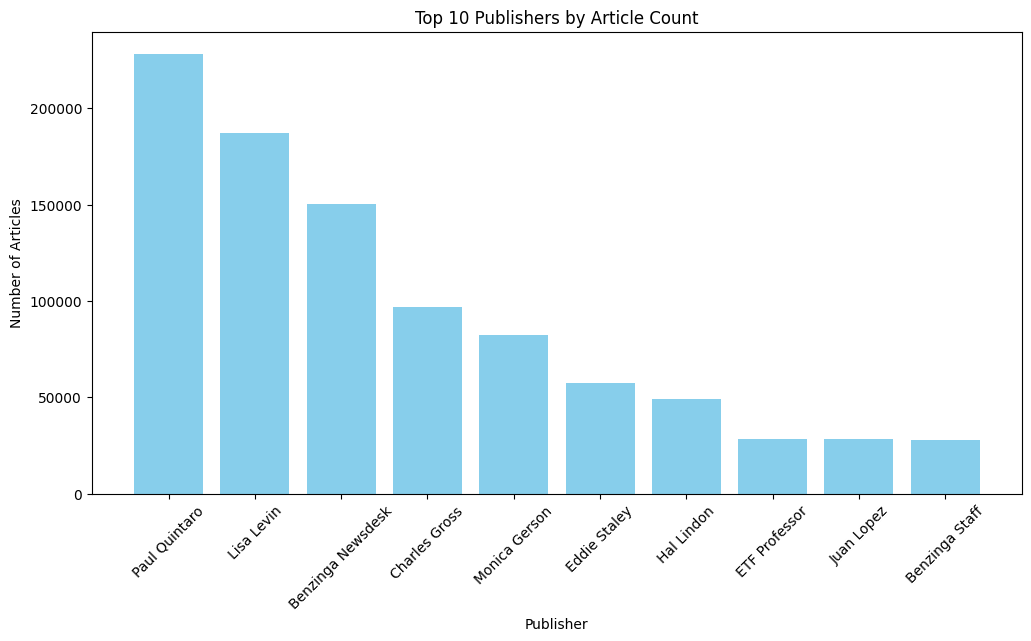

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_publishers['publisher'].head(10), top_publishers['article_count'].head(10), color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()